## Structure sequential model

The sequential model is always built up in the following way:
First you initialize the model as sequential with `mode=Seqential()`. Then you can add layers to the model  with `mode.add()`. 
Layers need some input parameters to work. Depending on the layer the parameter change. We will explain all parameters below and link them to the layers. 


**Structure when working with images (CNN)**

The model structure starts with a first layer which has as additional information the input_size. Following layers do not need that as they orient on the first layer output. 
You can add all kinds of layers in different combination afterwards. For image classification you mainly mix `conv2D` layers with `MaxPolling` layers. For classification tasks, the last layer is often a dense layer with softmax activation and hidden_layers=number of classes. Thereby, the weight are "ziped" to the number of classes to classify. Before this last step, you have to flatten the data as it is still in form of the input dimensions which is e.g., 2D(grayscale), 3D(RGB), or 4D(RGBa). We want an array with a value per class. 
To increase bias and improve convergence you can drop a `dropout` layer once in a while. 
These base structures (shown below in the `Einfaches_CNN_Model` function) have been proven to work well for image classification tasks. 

The artist part is to combine all layers at hand in unique ways to obtain best results for the task. Known network structures such as VGG, ResNet,... can be seen as such artworks. 

**Structure when working with time series data (RNN)**

Models for timeseries data are very similar in their construction but use different layer compositions. 
The central difference is that the main layer is not the `Conv2D` but an `LSTM` or `GRU` layer wich are specific for time series analysis. The flatten layer is also not needed as the layers give an estimation output for each timestep.

**Structure when working with generative networks**

we will not look into generative networks :-)


## Main types of layer 

- **Conv1D (temporal sequence), Conv2D (image), Conv3D (volumen)**
  - filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None 
  
  The convolutional layers are the core ingredient of a CNN network. Hence the name. The layer is composed of a set of learnable filters/kernels.Those can be compared with the nodes or neurons. Each of those filters/kernels  is convoluted over the input data in width and height. The mathematical operation is a dot product between the input and the filter/kernel. The result is a activation map (or  feature maps, channels, activations, tensors, planes) for each filter. 
  
    - *Filteres* (neurons/hidden units/kernel):  How many filters you want to use. Usually, more filters means more complex network -> more parameters -> more computation is done.  
    - *kernel_size*: How large the filter is (width height, ... depending on dimension). Depending on where the info might be placed (detail -> small filter or bigger pixel groups -> larger filter)
    - *stride*: how much the filter is moving in one step.Higher stride reduces the spatial dimensions 
    - *input_shape*: If you are using a sequential model, the first layer needs to know the input dimensions of your data. The data must have same dimensions over all samples(Images). (there are exceptions, but don^t go there)    
   


- **Max- / sum- / mean- Pooling1D, ...2d**
  - pool_size=(2, 2), strides=None, padding='valid', data_format=None
 
   After the first convolution layer, the the dimensions can increase drastically. Therefore, downsampling is needed. 
  
   The pooling layer is a form of non linear down-sampling. An image is segmented into non overlapping rectangles and returns one max, sum or, mean value for each of this rectangles. Thereby, the size is reduced by the number of rectangles. 
  The different functions represent the patterns of the subregions differently.
  
   **Most deep networks today use a single layer of global average pooling at or near the top of the network, rather than rely on multiple layers of fully connected networks for the highest levels of processing**.
  
   **[The high performance](https://towardsdatascience.com/dont-use-dropout-in-convolutional-networks-81486c823c16) of the batch-normalized model supports the claim that batch normalization should be used between convolutions.**

   **Furthermore, dropout should not be placed between convolutions, as models with dropout tended to perform worse than the control model.**
   
   the pooling and the flatten layer are mostly responsible for loosing information on location of an object. Meaning a nose can be classified as a nose even if it is not where a nose should be (solution Capsule Networks)
  
  
- **Dropout**
   - rate=  zero to one. Commonly used 0.3-0.6, noise_shape=None, (batch_size, 1, features) if you want the same dropout shape fro each batch, seed=42

    The dropout layer is used to reduce overfitting and correspondingly increase the generalization of a model by randomly (seed) setting some inputs to 0 during training. 
   Overfitting is  the case that the model starts to perfectly fit to the training data as it rahter learns the pattern of the training data instead of the general information of the pattern. Meaning that the model will perform very good on the training data, but as soon as you give it new data the performance is based on chance. 
   Dropout is a good mechanism to fight overfitting. Regularization is another tool. See below about regularization.
   
     

- **Flatten**

      The flatten layer only flattens the input. It does not change the batch size. Flatten is used to merge all the locally found information into a flattened 2D array. This is needed for the following dense layer, which 
      (None, 64, 32, 32) -> (None, 65536) , None is the batch dimension which is not affected
    

- **Dense (fully connected)**
   - units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None
   
    The dense layer connects the layer before on a one to one level to the next layer. Meaning that all values from the previouse nodes/neurons are merged into one node/neuron of the dense layer.  
   Thereby, the dense layer applies a non-linear transformation on its input based on the (element wise) activation function. <div class="alert alert-block alert-warning">
   From Keras:
   Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True)
   <div>
   No activation function is chosen when we either want to reduce dimensionality and numbers of parameters or the output should be linear (as e.g, with regression). Reduced dimensionality is interesting when we have a problem with to many options. One example is finding words which belong together. You could just count the number context words with the given word, but that would be huge, so we first reduce dimensionality.




- **simpleRNN**

   Fully-connected RNN where the output is to be fed back directly to the input. Here there is simple multiplication of input  and Previous Output. Passed through activation function. No Gates present.
   The problem with simple RNNs is that the information gets lost if the network gets to deep (vanishing and exploding gradients)
   

- **LSTM (CuDNNLSTM when using GPU)**

   The LSTM introduced the memory unit to overcome the gradient problem transferring the information through the layer. Second a forget and Output gate were introduced.The forget layer determines how much of the previous memory is transmitted. The output gate transfers the newly created information to the next layer.
   
   Very nice in depth [explanation](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)
   
   

- **GRU (CuDNNGRU when using GPU)**

  GRU layers use only an update gate. The update gate decides whether to pass previous output to next Cell or not. Forget and Output are not used as with the LSTM. The forget gate is here nothing but additional mathematical Operations with a new set of Weights.
  
  LSTM layers are more complex but slightly slower than GRU layers. So far, it seems that both layers are on pair performance wise. This depends mainly on the task at hand. 
  

- **ConvLSTM2D**

  Here a convoutional layer is stacked with an LSTM layer. Previouse to this layer a normal conv and LSTM layer would be stacked where the Conv would indentify the spartial features (automated feature extraction) and the LSTM the time dependent information in such spartial features. Nevertheless, it was found that the time-space feature correlation is not propoerly captured with this technique. Therfore,  Xingjian Shi et al.(arXiv:1506.04214) introduced the ConvLSTM layer which uses convolution in both the conv and LSTM part. 



- **activation**

  Can be used as a separate layer but mostly the first layer has also activation parameter input. It is the same as a Dense Layer with activation: `Dense(activation=softmax)`. You use this layer if you want to separate the operations to retrieve the information between e.g., Dense and softmax activation before returning the results.
  
  More on the activation functions below
  

- **masking**

  Masking layers mark data that will be skipped for processing. This is useful if you have padded you input data beforehand to make the tensor equal sized. Pad the data with one specific value which will be marked as the `mask_value`. 
  
  



## Activation functions
Activation function defines the output of a layer based on its input.
Without an activation function, no other than linear combination/dependencies in the data could be determined. If we want to extract non linear information we have to activate or intorduce nonlinearities into the network.

If we would not add activation, we would just add linear function to linera function by each layer, which results in a linear function.

Activation functions determine how much a neuron is activated/stressed in a layer. The greater the input value for a neuron, the more activated/stressed it gets. 

- Sigmoid: transform negative numbers close to 0 and positives close to 1. 
  - Problem: vanishing/exploding gradients
  - Not centered around zero. All weights getting close to 0 or 1 over time. Difficult optimization
- tanh: Negative= -1 positive=1 
  - Problem: vanishing/exploding gradients
- Relu: Negative = 0, positive = input value (slope=1)
  - Problem: Dead neurons
- Leaky Relu: Negative = small negative slope, positive = input value (slope=1). That fixes dead neurons as they never become totally zero.
- Maxout: Mix of Relu and leaky Relu
   - Problem: double the parameters per Neuron leading to more computation
- ELU: leaky relu but not with a fixed negative slope   
The recommended order (March 2019) seems: ELU >> leaky ReLU > ReLU > tanh, sigmoid. There is basically never  an excuse to use tanh or sigmoid.


## Initializers

   The weights of a deep learning network are distributed via random number initialization based on a specific distribution (mean=0;std=1). 
   Unfortunately, this can lead to very high varianz down the nodes as the varianz of each node is summed from the input layer nodes. This can lead to very slow gradient updates by influenzing the activation output by only very small degrees. Therefore, we initialize the weights based on the number of input nodes. With Var(weight)=1/n or 2/n. With n being the number of input nodes (Xavier activation) which reduces the varianz/std significantly increasing the speed of the training again.
   
   This is all done automatically in Keras. Never the less, it is good to know that the initializer can be changed, e.g., using a different distribution than a normal one (which is default).
   

## Optimizers



## Regularizers

Both L1 and L2 shrink the weight and reduce the magnitude of them. They do that with different curves. L1 is more hard than L2 (Gaus vs Laplace).

L1 (lasso, Laplace): Feature focus, importance ranking and focusing on the most important features. Automated feature selection.

L2 (ridge, Gaussian) : general reduction of the weights in the network. General reducing overfitting. 

kernel_regularizer: Regulating the weight of that layer
activity_regularizer: Adding the regularizing on the output of that layer

## Constraints 





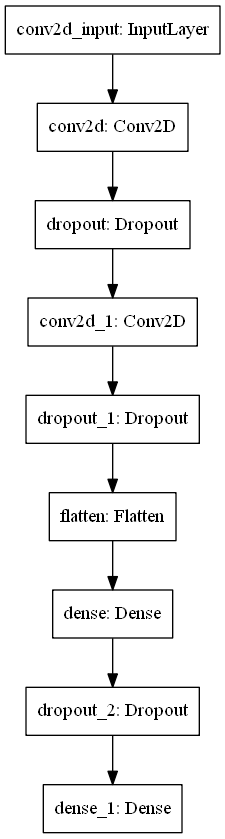

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


def sequential_CNN_Model(input_shape,num_category):
    #model building
    model = Sequential()

    #convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    #32 convolution filters used each of size 3x3
    #randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.3, seed=42))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    #64 convolution filters used each of size 3x3
    #randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.25))
    #flatten since too many dimensions, we only want a classification output
    model.add(Flatten())
    #fully connected to get all relevant data
    model.add(Dense(128, activation='relu'))
    #one more dropout for convergence' sake :) 
    model.add(Dropout(0.3, seed=42))
    #output a softmax to squash the matrix into output probabilities
    model.add(Dense(num_category, activation='softmax'))
    
    return(model)

model=sequential_CNN_Model([10,255,255],2)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


def sequential_CNN_Model(input_shape,num_category):
    #model building
    model = Sequential()

    #convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3, seed=42))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_category, activation='softmax'))
    
    return(model)

model=sequential_CNN_Model([10,255,255],2)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

## Structure for functional API models

- **merge**
   merging layer can be done in multiple mathematical ways: 
   add, subtract, multiply, average, max, min, concatenate, dot product, 
   

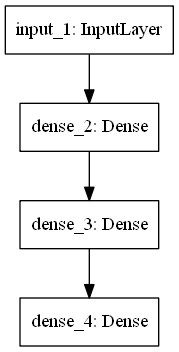

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#model.fit(data, labels)  # starts training

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')


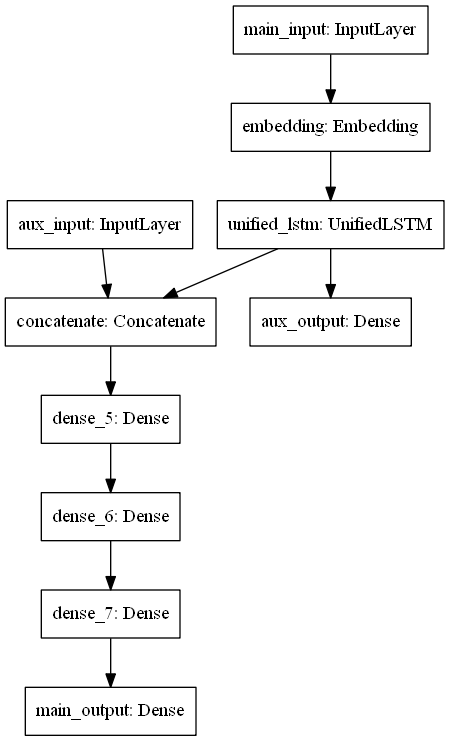

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(5,), name='aux_input')
x = tf.keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
